# Подготовка модели распознавания рукописных букв и цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [1]:
# !pip uninstall emnist
# your pip installs here

In [2]:
# !pip install numpy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

In [1]:
import os
import pickle
import emnist
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
# your imports here

### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [2]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
images_train, labels_train = emnist.extract_training_samples('balanced')
images_test, labels_test = emnist.extract_test_samples('balanced')
print(f'Train: {images_train.shape[0]} samples')
print(f'Test: {images_test.shape[0]} samples')
print(f'Image size: {images_train.shape[1]}x{images_train.shape[2]}')

Train: 112800 samples
Test: 18800 samples
Image size: 28x28


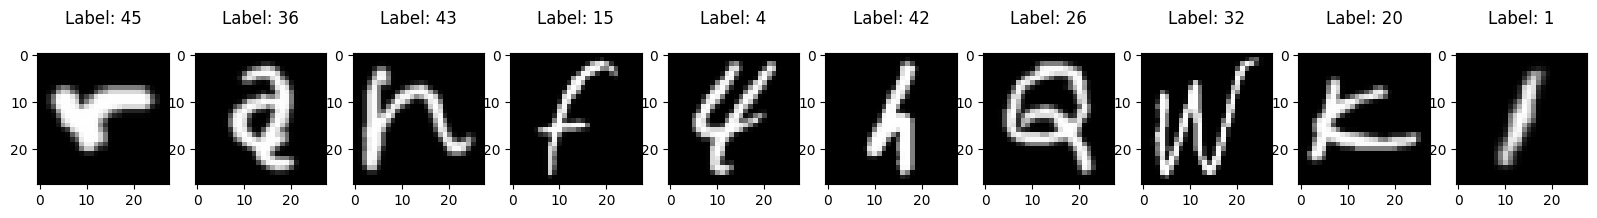

In [6]:
fig, axs = plt.subplots(1, 10, figsize=(20,4))
for i in range(10):
    axs[i].imshow(images_train[i], cmap='gray')
    axs[i].set_title('Label: %i\n' % labels_train[i])

In [7]:
images_train_flatten = [i.flatten() for i in images_train]
images_test_flatten = [i.flatten() for i in images_test]

In [8]:
scaler = MinMaxScaler()

### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [9]:
X_train = np.array(images_train_flatten)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
y_train = labels_train.copy()
X_test = np.array(images_test_flatten)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
y_test = labels_test.copy()

print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (112800, 784)
Test: (18800, 784)


### 4. Выберите модель, обучите её, протестируйте и сохраните

Выведите на экран точность вашей модели. Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?

In [10]:
clf_mlp = MLPClassifier(max_iter=600)
clf_mlp.fit(X_train, y_train)
predictions_mlp = clf_mlp.predict(X_test)

In [11]:
acc = accuracy_score(y_test, predictions_mlp)
acc

0.7720212765957447

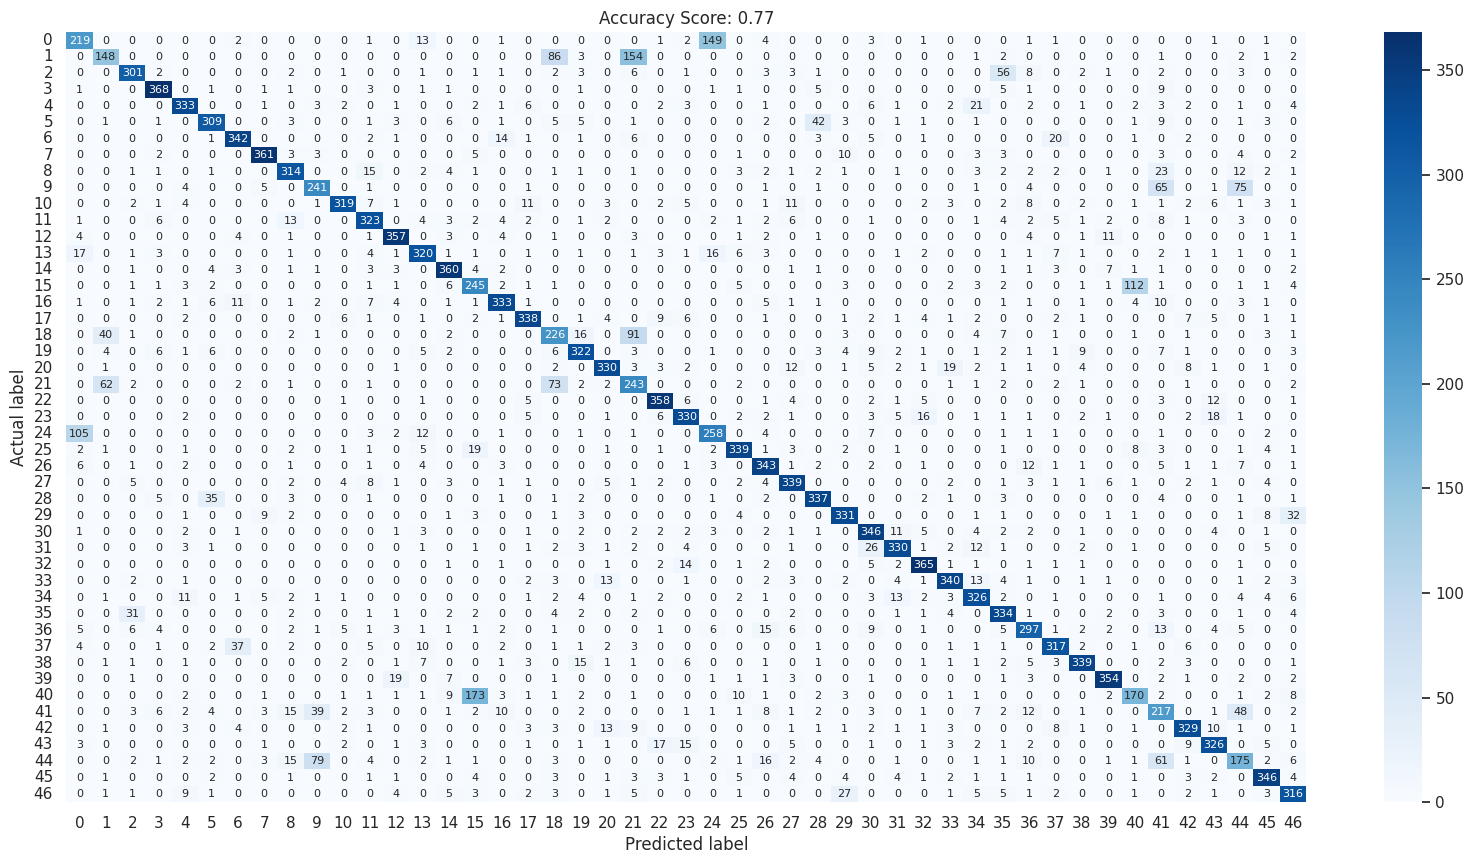

In [43]:
cm = confusion_matrix(y_test, predictions_mlp)

plt.figure()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(cm, annot=True, fmt='g', annot_kws={"fontsize":8}, square=False, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {acc:.2f}')
plt.show()

Чаще всего модель ошибается при классификации классов:\
24 - классифицируется как 0 в 105 случаях\
18 - классифицируется как 1 в 40 случаях\
21 - классифицируется как 1 в 62 случаях\
44 - классифицируется как 9 в 79 случаях\
40 - классифицируется как 15 в 173 случаях\
1 - классифицируется как 18 в 96 случаях\
21 - классифицируется как 17 в 73 случаях\
1 - классифицируется как 20 в 154 случаях\
18 - классифицируется как 21 в 91 случае\
0 - классифицируется как 24 в 149 случаях\
5 - классифицируется как 28 в 42 случаях\
2 - классифицируется как 35 в 56 случаях\
15 - классифицируется как 40 в 112 случаях\
9 - классифицируется как 41 в 65 случаях\
44 - классифицируется как 41 в 61 случае\
9 - классифицируется как 44 в 75 случаях\
41 - классифицируется как 44 в 48 случаях\

In [37]:
with open(os.path.join('myapp', 'model.pkl'),'wb') as f:
    pickle.dump(clf_mlp, f)